# Standardization of Data

Standardization of data puts variables on scales with the same mean (zero) and standard deviation (1). This allows a comparison of the relative contribution of variables, measured on different scales, to the statistical and Machine Learning models in which they are used as Independent Variables or features.

### Z- Score Method of Standardization
The formula for the Z-Score is:

### Scaled_value = value - mean / std

Standarization of a variable using the z-score formula puts that variable on a scale with a mean of zero and a std of 1.

In [1]:
# Starting with the necessary software imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("whitewine.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5,white
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6,white
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6,white
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4,white
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6,white


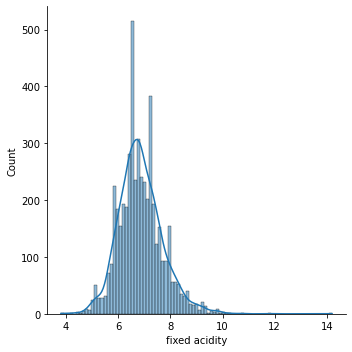

In [3]:
# Distribution plot for the fixed acidity variable. Note the mean is ~ 7 on the existing scale. 
sns.displot(df['fixed acidity'], kde=True)

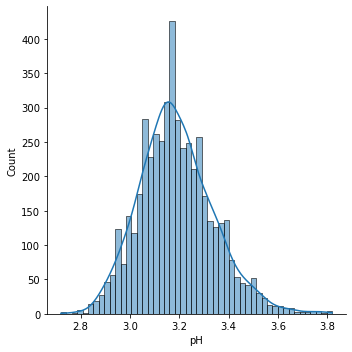

In [4]:
# Distribution plot for the pH variable. Note the mean is around 3.1 on the existing scale. 
sns.displot(df['pH'], kde=True)

In [5]:
# Making a copy of the dataset to work with:

scaled_data = df.copy()

In [6]:
# Applying the z-score formula. Here scaling two variables at once (fixed acidity and pH):

for col in ['fixed acidity', 'pH']:
    scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()

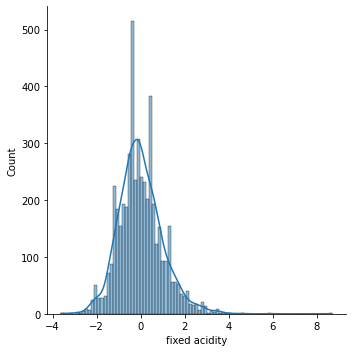

In [7]:
# Plotting the distribution of the data, we can now see the new scale with a mean of 0. 
sns.displot(scaled_data['fixed acidity'], kde=True)

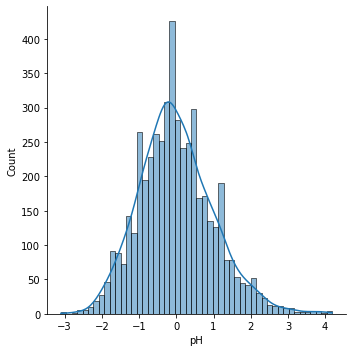

In [8]:
# Plotting the distribution of the data, we can now see the new scale with a mean of 1. 
sns.displot(scaled_data['pH'], kde=True)

### Above we used a manual formula to standardize the variable. 
### We can also used the StandardScaler method from Scikit-learn. 

In [9]:
# Importing StandardScaler from Scikit-learn and setting it to an object for brevity:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
# Fitting the pH data using StandardScaler:
sc.fit(df[['pH']])

StandardScaler()

In [11]:
# Creating a new scaled data object. This is bascially a column vector for this variable as we didn't save it to the
# data frame as a new variable:
sc_data = sc.transform(df[['pH']])

In [12]:
# We can reshape the column vector into a 1-dimensional array:

sc_data  = sc_data.reshape(-1)

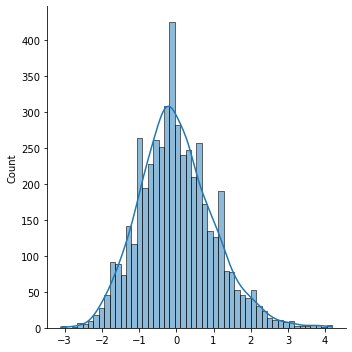

In [13]:
sns.displot(sc_data, kde=True)

# Plottimng the data we can see that it is now on a scale with a mean of zero. 

To go in reverse and change the variable back to the original values, we would just need to perform some algebraic manipulation and use the formula:

### original value = (scaled value * std) + mean